# MECO

Feature extraction and data preparation for the MECO dataset

We chose the "joint_data_trimmed.dat" file in the MECO website (https://meco-read.com/).

Interesting paper that describe the dataset, https://link.springer.com/epdf/10.3758/s13428-021-01772-6?sharing_token=As4e3osuA15IaUCKtCvDT5AH0g46feNdnc402WrhzyoEtpF3alySPm1lAWocS1ewk9OZlpPc3CqibACC23iBC_nacc6BD4_GPYLuUZJAvfWHoa8e0hjmhhFn9fLIgIRd3VzSfjlcpQ3gS4EiUY2YpRXjDSh3hB5Zx5kZpkk4yIQ=.

## Import Libs and Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("joint_data_trimmed.csv", index_col=0)

We have chose to use the following features for each sample:

- **Skipping**: a binary index of whether the word was fixated at least once during the entire reading of the text [and not only during the first pass].
- **First Fixation**: the duration of the first fixation landing on the word.
- **Gaze Duration**: the summed duration of fixations on the word in the first pass, i.e., before the gaze leaves it for the first time.
- **Total Fixation Duration**: the summed duration of all fixations on the word.
- **First-run Number of Fixation**: the number of fixations on a word during the first pass.
- **Total Number of Fixations**: number of fixations on a word overall.
- **Regression**: a binary index of whether the gaze returned to the word after inspecting further textual material.
- **Rereading**: a binary index of whether the word elicited fixations after the first pass.


In [3]:
# following a paper cited on the MECO website, i will use a subset of the gaze features
gaze_features = ["skip", "firstfix.dur", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "refix", "reread"]
basic_features = ["trialid", "sentnum", "ianum", "ia", "lang", "uniform_id"]
df = df[basic_features + gaze_features]

In [4]:
df.head()

,trialid,sentnum,ianum,ia,lang,uniform_id,skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
1,1.0,1.0,1.0,Janus,du,du_1,0.0,154.0,154.0,400.0,1.0,2.0,0.0,1.0
2,1.0,1.0,2.0,is,du,du_1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,3.0,in,du,du_1,0.0,551.0,551.0,551.0,1.0,1.0,0.0,0.0
4,1.0,1.0,4.0,de,du,du_1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,1.0,5.0,oude,du,du_1,0.0,189.0,189.0,439.0,1.0,2.0,0.0,1.0


## Data Understanding

We can notice that there are some Null elements, for the gaze_features except skip, those Null elements are in the rows with skip == 1, representing the fact that cannot be captured.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855123 entries, 1 to 855123
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   trialid        855122 non-null  float64
 1   sentnum        855122 non-null  float64
 2   ianum          855122 non-null  float64
 3   ia             854741 non-null  object 
 4   lang           855122 non-null  object 
 5   uniform_id     855123 non-null  object 
 6   skip           855122 non-null  float64
 7   firstfix.dur   639530 non-null  float64
 8   firstrun.dur   639530 non-null  float64
 9   dur            639530 non-null  float64
 10  firstrun.nfix  639530 non-null  float64
 11  nfix           639530 non-null  float64
 12  refix          639454 non-null  float64
 13  reread         639530 non-null  float64
dtypes: float64(11), object(3)
memory usage: 97.9+ MB


In [6]:
df.describe()

,trialid,sentnum,ianum,skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
count,855122.000000,855122.000000,855122.000000,855122.000000,639530.000000,639530.000000,639530.000000,639530.000000,639530.000000,639454.000000,639530.000000
mean,6.319812,5.100584,84.710652,0.252118,214.771812,274.000635,396.190598,1.291295,1.870305,0.270565,0.315846
std,3.440210,2.697842,51.443266,0.434229,94.834265,181.464901,332.095123,0.666067,1.378493,0.444252,0.464852
min,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000
25%,3.000000,3.000000,41.000000,0.000000,156.000000,171.000000,199.000000,1.000000,1.000000,0.000000,0.000000
50%,6.000000,5.000000,82.000000,0.000000,200.000000,229.000000,297.000000,1.000000,1.000000,0.000000,0.000000
75%,9.000000,7.000000,124.000000,1.000000,255.000000,324.000000,478.000000,1.000000,2.000000,1.000000,1.000000
max,12.000000,16.000000,243.000000,1.000000,12688.000000,12688.000000,15579.000000,44.000000,50.000000,1.000000,1.000000


In [7]:
df.lang.unique()

array(['du', 'ee', 'fi', 'ge', 'gr', 'he', 'it', 'ko', 'en', 'no', nan,
       'ru', 'sp', 'tr'], dtype=object)

Get a subset of languages, choosen look a the ones handled by mBERT (https://huggingface.co/bert-base-multilingual-cased).

- **German**
- **Italian**
- **Russian**
- **English**
- **Spanish**

In [8]:
# get only the languages that are necessary to the project
supported_languages = ["ge", "it", "ru", "en", "sp"]

In [9]:
df = df[df.lang.isin(supported_languages)]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402904 entries, 193910 to 823179
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   trialid        402904 non-null  float64
 1   sentnum        402904 non-null  float64
 2   ianum          402904 non-null  float64
 3   ia             402834 non-null  object 
 4   lang           402904 non-null  object 
 5   uniform_id     402904 non-null  object 
 6   skip           402904 non-null  float64
 7   firstfix.dur   292582 non-null  float64
 8   firstrun.dur   292582 non-null  float64
 9   dur            292582 non-null  float64
 10  firstrun.nfix  292582 non-null  float64
 11  nfix           292582 non-null  float64
 12  refix          292539 non-null  float64
 13  reread         292582 non-null  float64
dtypes: float64(11), object(3)
memory usage: 46.1+ MB


In [11]:
df.head()

,trialid,sentnum,ianum,ia,lang,uniform_id,skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
193910,1.0,1.0,1.0,In,ge,ge_1,0.0,164.0,164.0,164.0,1.0,1.0,0.0,0.0
193911,1.0,1.0,2.0,der,ge,ge_1,0.0,166.0,166.0,657.0,1.0,3.0,0.0,1.0
193912,1.0,1.0,3.0,alten,ge,ge_1,0.0,144.0,144.0,717.0,1.0,3.0,0.0,1.0
193913,1.0,1.0,4.0,römischen,ge,ge_1,0.0,219.0,219.0,1231.0,1.0,6.0,0.0,1.0
193914,1.0,1.0,5.0,Religion,ge,ge_1,0.0,151.0,151.0,1338.0,1.0,8.0,1.0,1.0


Notice that in the samples' gaze_features with skip == 0 there aren't Null elements.

In [12]:
df[df.skip==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292582 entries, 193910 to 823178
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   trialid        292582 non-null  float64
 1   sentnum        292582 non-null  float64
 2   ianum          292582 non-null  float64
 3   ia             292575 non-null  object 
 4   lang           292582 non-null  object 
 5   uniform_id     292582 non-null  object 
 6   skip           292582 non-null  float64
 7   firstfix.dur   292582 non-null  float64
 8   firstrun.dur   292582 non-null  float64
 9   dur            292582 non-null  float64
 10  firstrun.nfix  292582 non-null  float64
 11  nfix           292582 non-null  float64
 12  refix          292539 non-null  float64
 13  reread         292582 non-null  float64
dtypes: float64(11), object(3)
memory usage: 33.5+ MB


In [13]:
df[df.skip==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110322 entries, 193926 to 823179
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   trialid        110322 non-null  float64
 1   sentnum        110322 non-null  float64
 2   ianum          110322 non-null  float64
 3   ia             110259 non-null  object 
 4   lang           110322 non-null  object 
 5   uniform_id     110322 non-null  object 
 6   skip           110322 non-null  float64
 7   firstfix.dur   0 non-null       float64
 8   firstrun.dur   0 non-null       float64
 9   dur            0 non-null       float64
 10  firstrun.nfix  0 non-null       float64
 11  nfix           0 non-null       float64
 12  refix          0 non-null       float64
 13  reread         0 non-null       float64
dtypes: float64(11), object(3)
memory usage: 12.6+ MB


Even more, there are some ia elements that are Null, we can see that most of them are not skipped words with a lot of Null elements, so we can drop them.

In [14]:
print("Probabilities of Null elements by columns, for the Null ia")
df[df.ia.isna()].isna().sum()/df[df.ia.isna()].shape[0]

Probabilities of Null elements by columns, for the Null ia


trialid          0.0
sentnum          0.0
ianum            0.0
ia               1.0
lang             0.0
uniform_id       0.0
skip             0.0
firstfix.dur     0.9
firstrun.dur     0.9
dur              0.9
firstrun.nfix    0.9
nfix             0.9
refix            0.9
reread           0.9
dtype: float64

In [15]:
df = df[~df.ia.isna()]

Fill gaze features of the skipped words with 0.

In [16]:
df = df.fillna(0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402834 entries, 193910 to 823179
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   trialid        402834 non-null  float64
 1   sentnum        402834 non-null  float64
 2   ianum          402834 non-null  float64
 3   ia             402834 non-null  object 
 4   lang           402834 non-null  object 
 5   uniform_id     402834 non-null  object 
 6   skip           402834 non-null  float64
 7   firstfix.dur   402834 non-null  float64
 8   firstrun.dur   402834 non-null  float64
 9   dur            402834 non-null  float64
 10  firstrun.nfix  402834 non-null  float64
 11  nfix           402834 non-null  float64
 12  refix          402834 non-null  float64
 13  reread         402834 non-null  float64
dtypes: float64(11), object(3)
memory usage: 46.1+ MB


In [18]:
df[["skip", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "refix", "reread"]].corr()

,skip,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
skip,1.000000,-0.652214,-0.543305,-0.741110,-0.587836,-0.287592,-0.333861
firstrun.dur,-0.652214,1.000000,0.720569,0.860484,0.616886,0.554956,0.224649
dur,-0.543305,0.720569,1.000000,0.648870,0.923882,0.555678,0.629876
firstrun.nfix,-0.741110,0.860484,0.648870,1.000000,0.712458,0.682079,0.256612
nfix,-0.587836,0.616886,0.923882,0.712458,1.000000,0.631961,0.685371
refix,-0.287592,0.554956,0.555678,0.682079,0.631961,1.000000,0.249470
reread,-0.333861,0.224649,0.629876,0.256612,0.685371,0.249470,1.000000


# Clustering Users

We need to cluster users to handle separate readers behaviours, since the fact that the grouped features have different correlation matrix wrt to non grouped data.

## Profiling the Users

First of all we have to see if each trial havethe same users

In [19]:
df.head()

,trialid,sentnum,ianum,ia,lang,uniform_id,skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
193910,1.0,1.0,1.0,In,ge,ge_1,0.0,164.0,164.0,164.0,1.0,1.0,0.0,0.0
193911,1.0,1.0,2.0,der,ge,ge_1,0.0,166.0,166.0,657.0,1.0,3.0,0.0,1.0
193912,1.0,1.0,3.0,alten,ge,ge_1,0.0,144.0,144.0,717.0,1.0,3.0,0.0,1.0
193913,1.0,1.0,4.0,römischen,ge,ge_1,0.0,219.0,219.0,1231.0,1.0,6.0,0.0,1.0
193914,1.0,1.0,5.0,Religion,ge,ge_1,0.0,151.0,151.0,1338.0,1.0,8.0,1.0,1.0


In [20]:
# not all the readers appear in all the trial

trial_readers = df.groupby("trialid").uniform_id.unique()

for trial in trial_readers:
    print(len(trial))

188
190
200
198
191
187
197
183
194
186
203
182


In [21]:
trial_readers.loc[1]

array(['ge_1', 'ge_2', 'ge_3', 'ge_4', 'ge_5', 'ge_6', 'ge_8', 'ge_9',
       'ge_10', 'ge_11', 'ge_12', 'ge_13', 'ge_14', 'ge_15', 'ge_16',
       'ge_17', 'ge_18', 'ge_19', 'ge_22', 'ge_23', 'ge_26', 'ge_30',
       'ge_32', 'ge_37', 'ge_39', 'ge_40', 'ge_41', 'ge_42', 'ge_44',
       'ge_45', 'ge_47', 'ge_48', 'ge_49', 'ge_50', 'ge_53', 'it_3',
       'it_5', 'it_6', 'it_7', 'it_8', 'it_9', 'it_1', 'it_10', 'it_11',
       'it_13', 'it_14', 'it_15', 'it_17', 'it_18', 'it_19', 'it_2',
       'it_21', 'it_23', 'it_24', 'it_26', 'it_29', 'it_30', 'it_32',
       'it_33', 'it_34', 'it_35', 'it_36', 'it_37', 'it_38', 'it_39',
       'it_41', 'it_42', 'it_43', 'it_44', 'it_46', 'it_48', 'it_50',
       'it_51', 'it_52', 'it_54', 'it_55', 'it_57', 'it_59', 'en_3',
       'en_6', 'en_10', 'en_101', 'en_102', 'en_14', 'en_18', 'en_26',
       'en_28', 'en_37', 'en_39', 'en_47', 'en_52', 'en_55', 'en_57',
       'en_60', 'en_61', 'en_72', 'en_74', 'en_76', 'en_78', 'en_79',
       'en_82', 'e

In [22]:
sets_trial_readers = []
for trial in trial_readers.values:
    sets_trial_readers.append(set(trial))

In [23]:
len(set.intersection(*sets_trial_readers))

69

The trials doesn't contain the same readers

In [25]:
reader_grouped_df = df.groupby(["uniform_id", "lang"])[gaze_features].mean().reset_index(level=0).reset_index(level=0)

In [26]:
reader_grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lang           239 non-null    object 
 1   uniform_id     239 non-null    object 
 2   skip           239 non-null    float64
 3   firstfix.dur   239 non-null    float64
 4   firstrun.dur   239 non-null    float64
 5   dur            239 non-null    float64
 6   firstrun.nfix  239 non-null    float64
 7   nfix           239 non-null    float64
 8   refix          239 non-null    float64
 9   reread         239 non-null    float64
dtypes: float64(8), object(2)
memory usage: 18.8+ KB


In [27]:
reader_grouped_df.uniform_id.unique()

array(['en_10', 'en_101', 'en_102', 'en_11', 'en_14', 'en_17', 'en_18',
       'en_21', 'en_26', 'en_27', 'en_28', 'en_3', 'en_36', 'en_37',
       'en_38', 'en_39', 'en_47', 'en_49', 'en_52', 'en_55', 'en_57',
       'en_6', 'en_60', 'en_61', 'en_70', 'en_72', 'en_74', 'en_76',
       'en_78', 'en_79', 'en_82', 'en_83', 'en_84', 'en_85', 'en_86',
       'en_87', 'en_88', 'en_89', 'en_90', 'en_91', 'en_93', 'en_94',
       'en_95', 'en_97', 'en_98', 'en_99', 'ge_1', 'ge_10', 'ge_11',
       'ge_12', 'ge_13', 'ge_14', 'ge_15', 'ge_16', 'ge_17', 'ge_18',
       'ge_19', 'ge_2', 'ge_22', 'ge_23', 'ge_24', 'ge_26', 'ge_28',
       'ge_29', 'ge_3', 'ge_30', 'ge_31', 'ge_32', 'ge_35', 'ge_36',
       'ge_37', 'ge_38', 'ge_39', 'ge_4', 'ge_40', 'ge_41', 'ge_42',
       'ge_44', 'ge_45', 'ge_46', 'ge_47', 'ge_48', 'ge_49', 'ge_5',
       'ge_50', 'ge_51', 'ge_52', 'ge_53', 'ge_6', 'ge_8', 'ge_9', 'it_1',
       'it_10', 'it_11', 'it_12', 'it_13', 'it_14', 'it_15', 'it_17',
       'it_18', 'it_

In [28]:
reader_grouped_df[gaze_features].corr()

,skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
skip,1.000000,-0.598373,-0.669727,-0.583786,-0.892263,-0.671640,-0.685804,-0.409434
firstfix.dur,-0.598373,1.000000,0.921004,0.697375,0.546337,0.381273,0.392686,0.206155
firstrun.dur,-0.669727,0.921004,1.000000,0.734492,0.765115,0.498719,0.681915,0.215557
dur,-0.583786,0.697375,0.734492,1.000000,0.599582,0.880972,0.621273,0.778786
firstrun.nfix,-0.892263,0.546337,0.765115,0.599582,1.000000,0.684047,0.920323,0.331641
nfix,-0.671640,0.381273,0.498719,0.880972,0.684047,1.000000,0.724434,0.887783
refix,-0.685804,0.392686,0.681915,0.621273,0.920323,0.724434,1.000000,0.397028
reread,-0.409434,0.206155,0.215557,0.778786,0.331641,0.887783,0.397028,1.000000


### Apply K-means to clusterize our datas

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tqdm import tqdm
import matplotlib.pyplot as plt

In [30]:
scaler = MinMaxScaler()

X = scaler.fit_transform(reader_grouped_df[gaze_features].values)

In [31]:
X

array([[0.79339466, 0.42390234, 0.24699641, ..., 0.05109609, 0.06354795,
        0.08428385],
       [0.48737739, 0.44213698, 0.36777953, ..., 0.30102438, 0.4476696 ,
        0.33186002],
       [0.43978275, 0.66560473, 0.52612795, ..., 0.2458228 , 0.33300482,
        0.28274558],
       ...,
       [0.87895514, 0.20262663, 0.14753046, ..., 0.19302489, 0.29674185,
        0.25054228],
       [0.48340795, 0.49275967, 0.56130928, ..., 0.5050735 , 0.84864851,
        0.41371083],
       [0.69579654, 0.44217546, 0.38844209, ..., 0.25459575, 0.38834759,
        0.31821712]])

In [32]:
sse_list = list()
separations = list()
silouettes_ = list()

max_k = 7
for k in tqdm(range(2, max_k + 1)):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    separations.append(metrics.davies_bouldin_score(X, kmeans.labels_))
    silouettes_.append(silhouette_score(X, kmeans.labels_))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 29.73it/s]


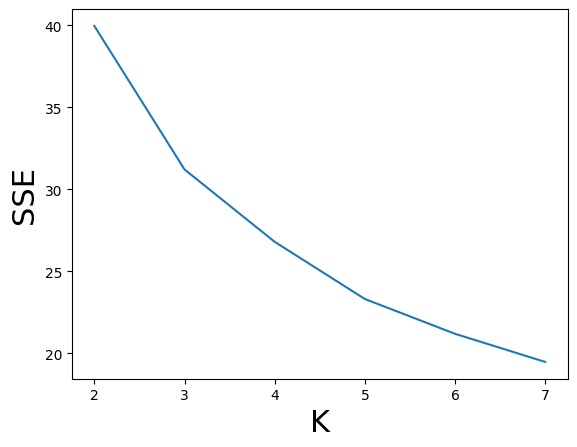

In [33]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(range(2, len(sse_list) + 2))
plt.show()

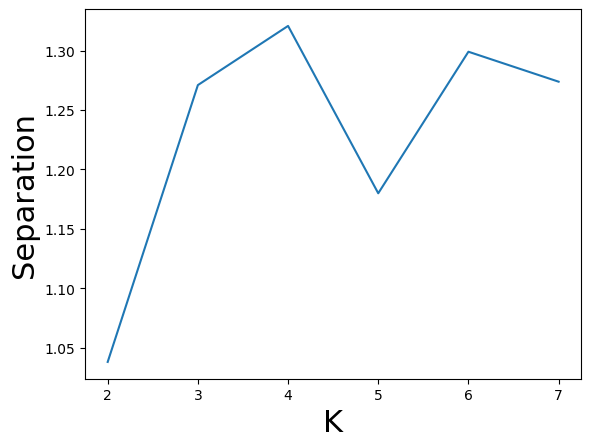

In [34]:
plt.plot(range(2, len(separations) + 2), separations)
plt.ylabel('Separation', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(range(2, len(separations) + 2))
plt.show()

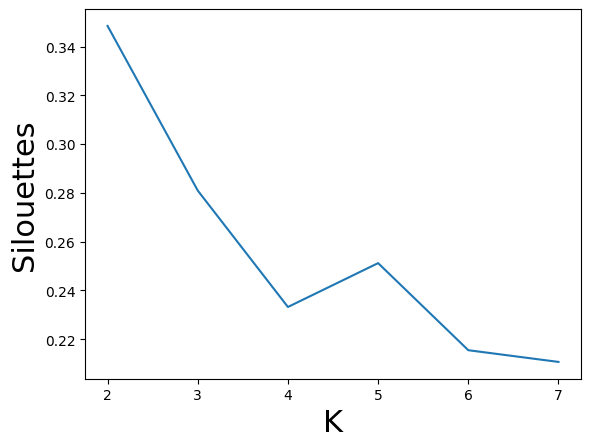

In [35]:
plt.plot(range(2, len(silouettes_) + 2), silouettes_)
plt.ylabel('Silouettes', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(range(2, len(silouettes_) + 2))
plt.show()

In [36]:
selected_k=5

kmeans = KMeans(n_clusters=selected_k, n_init=100, max_iter=500)
kmeans.fit(X)

KMeans(max_iter=500, n_clusters=5, n_init=100)

In [37]:
# sum up the metrics

print(f"SSE : {kmeans.inertia_}")
print(f"Separation : {metrics.davies_bouldin_score(X, kmeans.labels_)}")
print(f"Silhouette : {silhouette_score(X, kmeans.labels_)}")

SSE : 23.249962146386878
Separation : 1.1814569633843681
Silhouette : 0.25307805713198955


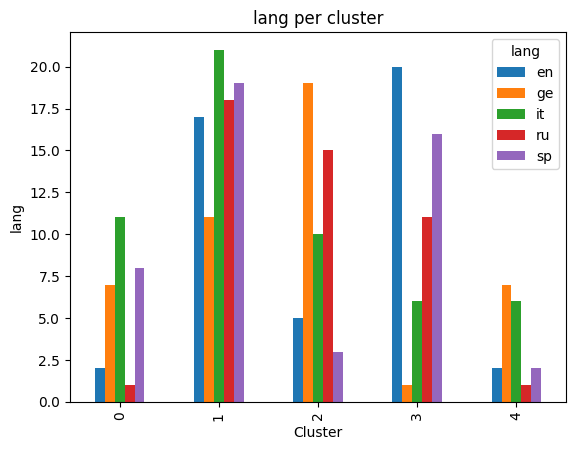

In [38]:
bot_xt_pct = pd.crosstab(kmeans.labels_, reader_grouped_df["lang"])
bot_xt_pct.plot(kind='bar', stacked=False, 
                   title=f'lang per cluster')
plt.xlabel('Cluster')
plt.ylabel("lang")
plt.show()

In [39]:
center = scaler.inverse_transform(kmeans.cluster_centers_)

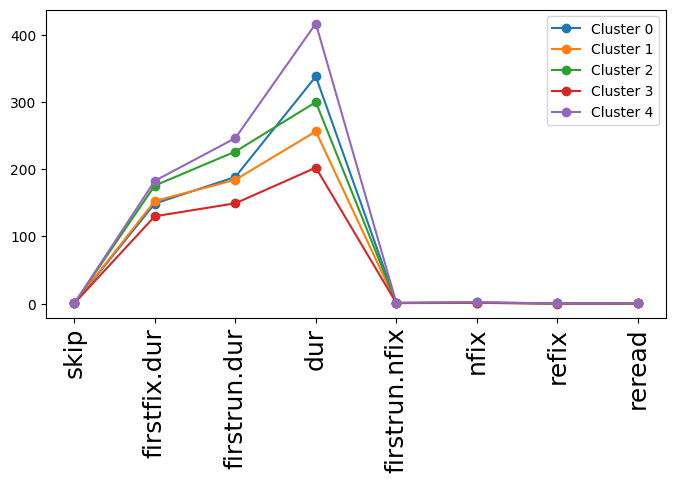

In [40]:
plt.figure(figsize=(8, 4))
for i in range(0, len(center)):
    plt.plot(center[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(gaze_features)), gaze_features, fontsize=18, rotation=90)
plt.legend(fontsize=10)
plt.show()

skip - firstfix.dur


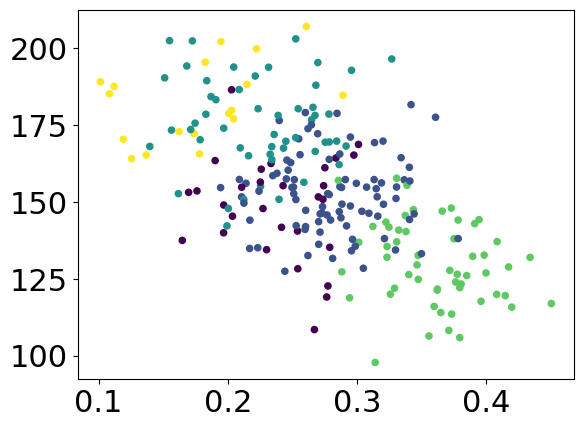

skip - firstrun.dur


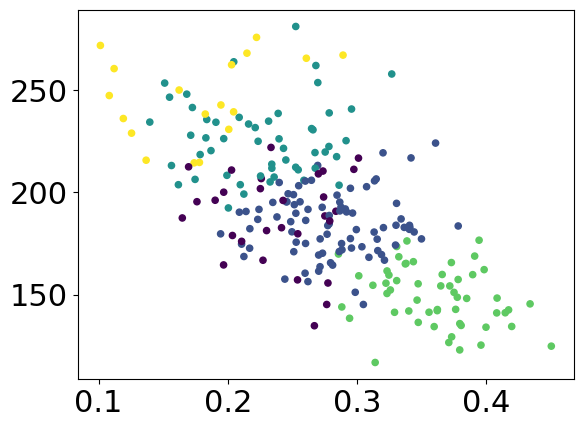

skip - dur


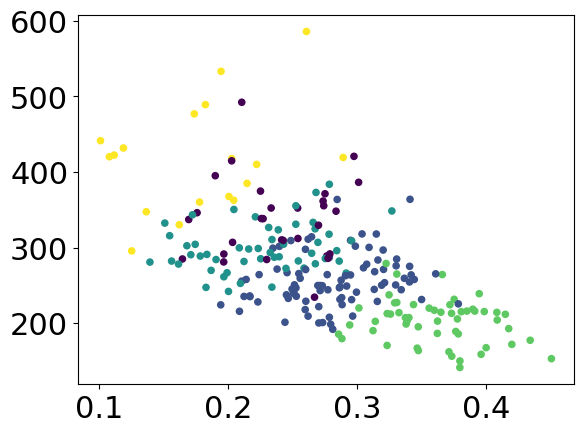

skip - firstrun.nfix


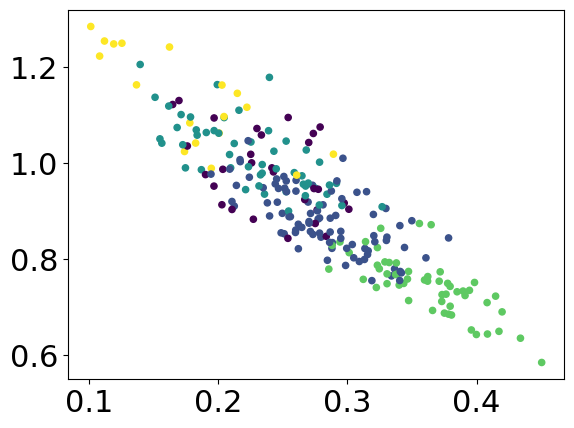

skip - nfix


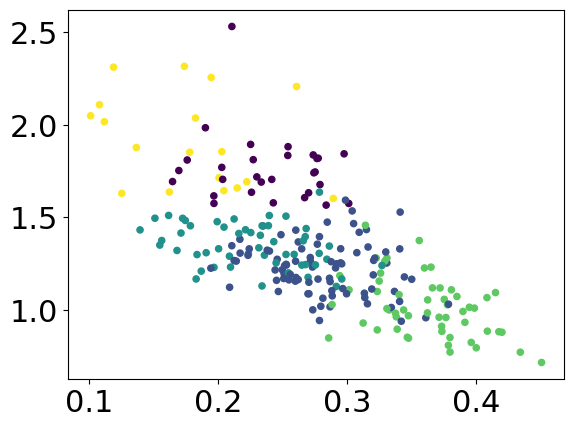

skip - refix


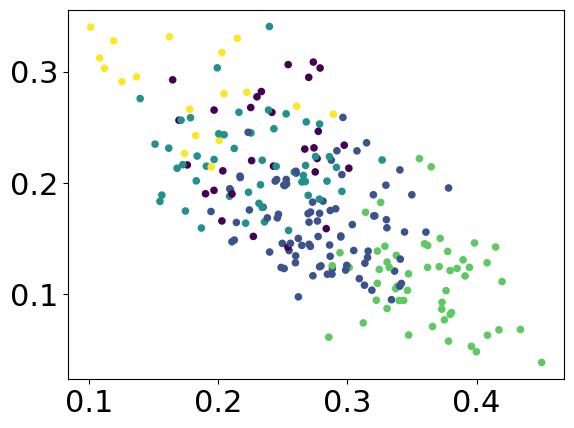

skip - reread


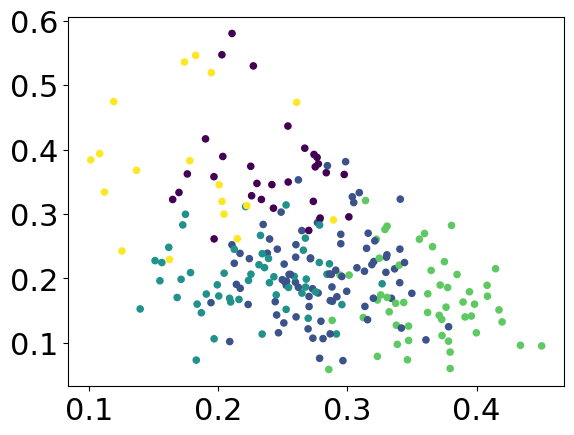

firstfix.dur - firstrun.dur


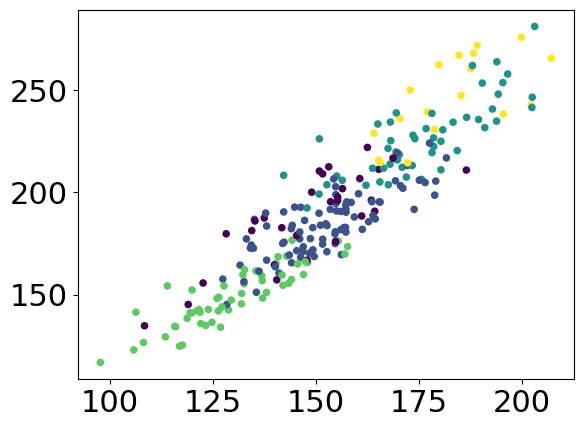

firstfix.dur - dur


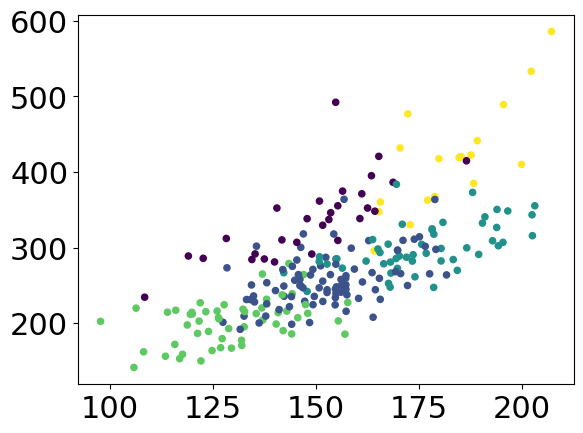

firstfix.dur - firstrun.nfix


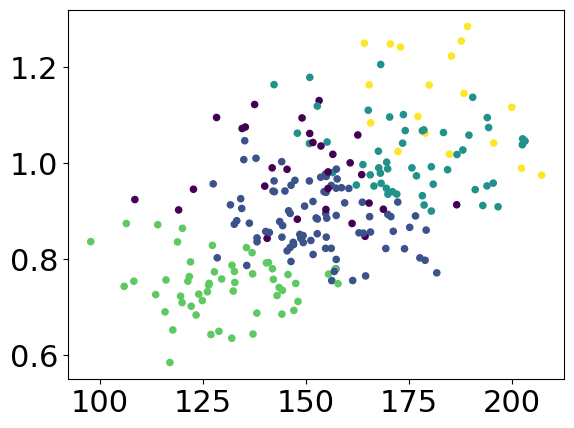

firstfix.dur - nfix


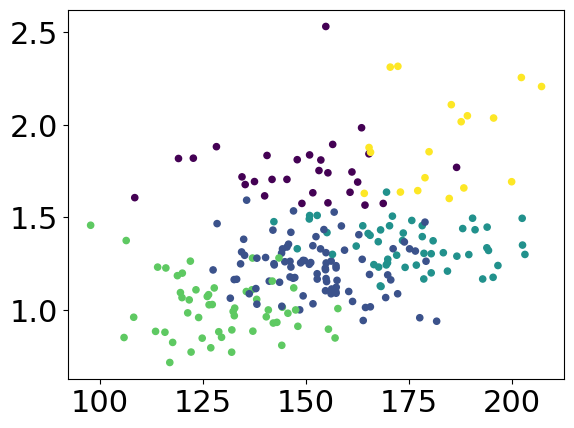

firstfix.dur - refix


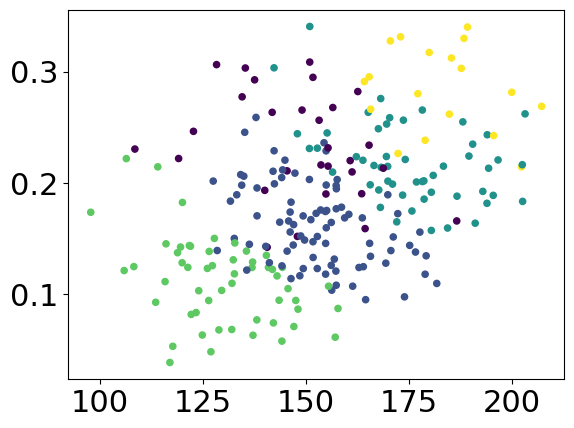

firstfix.dur - reread


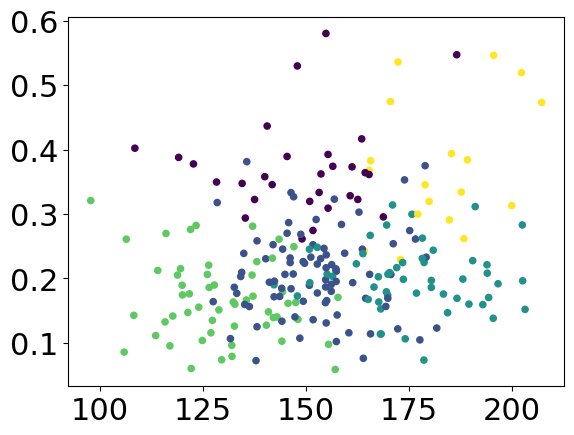

firstrun.dur - dur


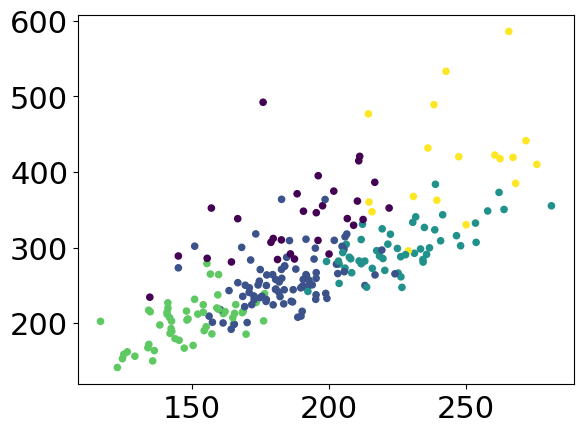

firstrun.dur - firstrun.nfix


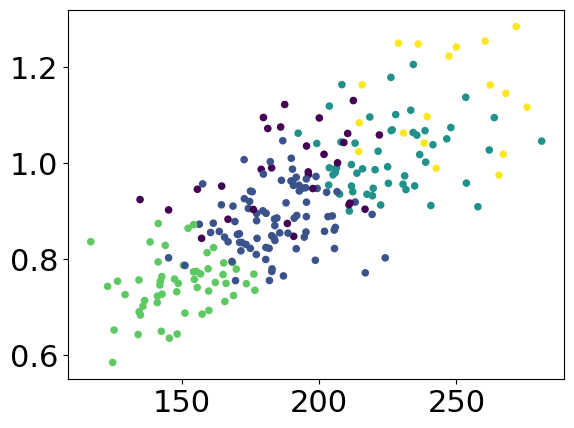

firstrun.dur - nfix


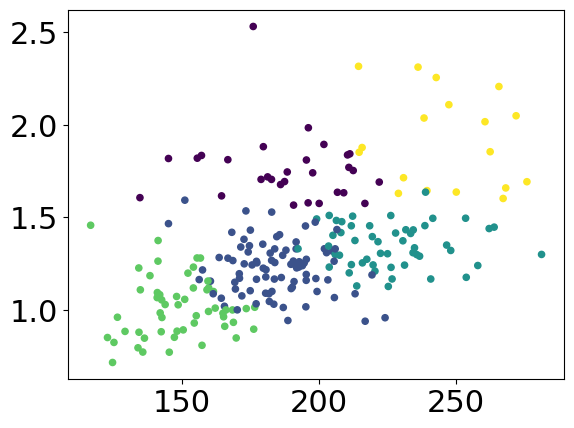

firstrun.dur - refix


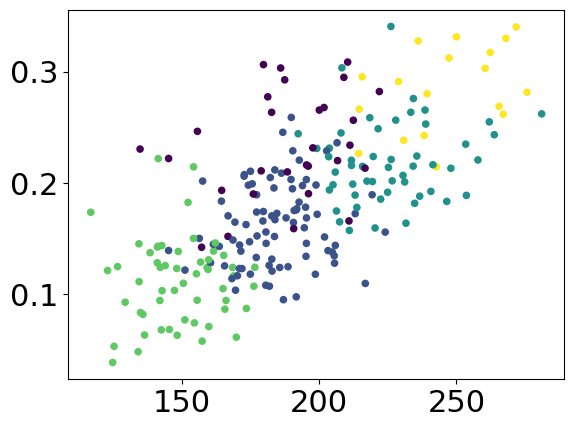

firstrun.dur - reread


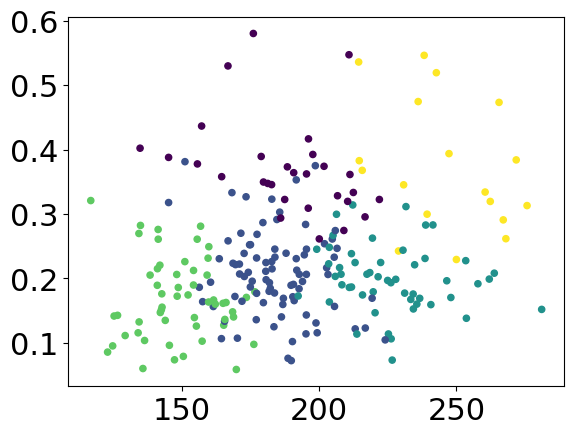

dur - firstrun.nfix


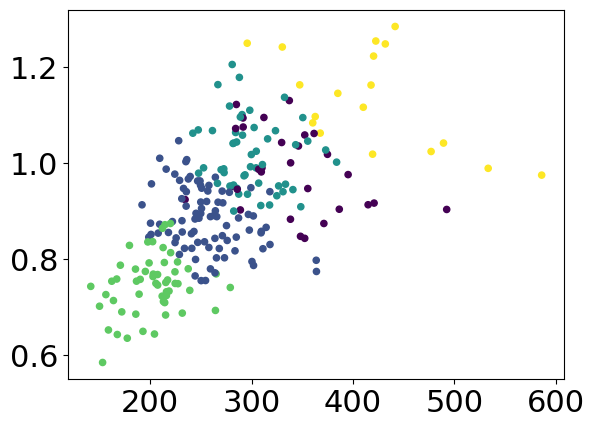

dur - nfix


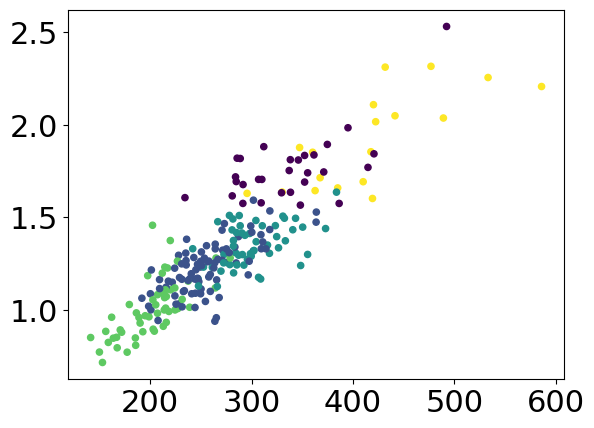

dur - refix


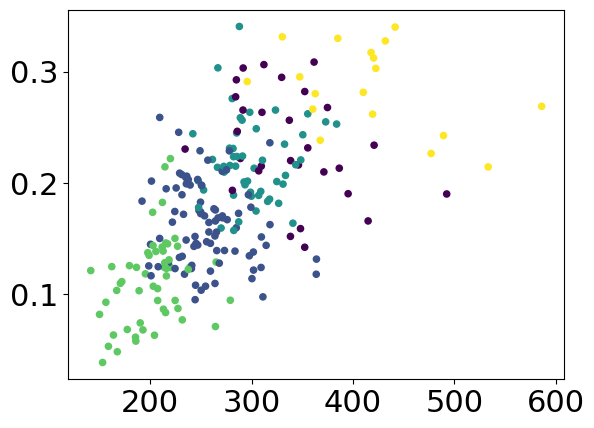

dur - reread


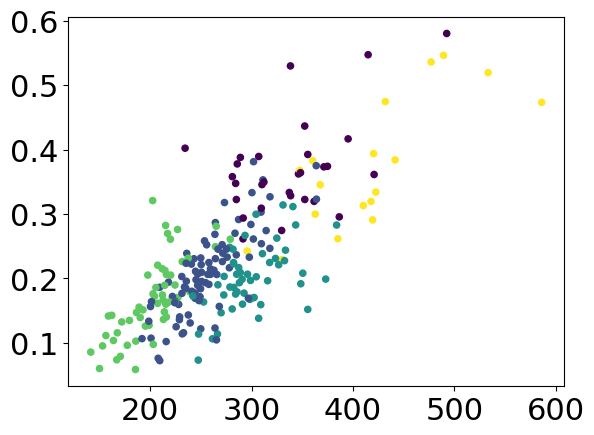

firstrun.nfix - nfix


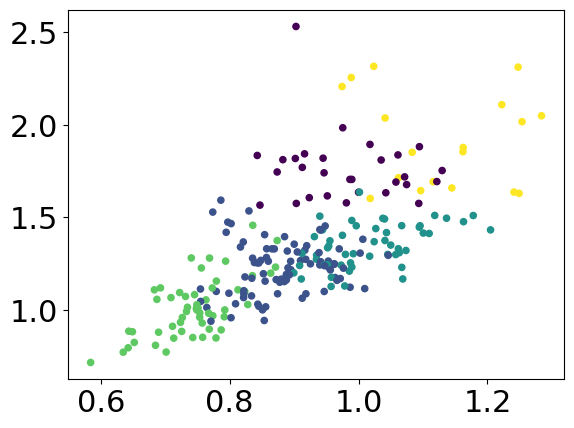

firstrun.nfix - refix


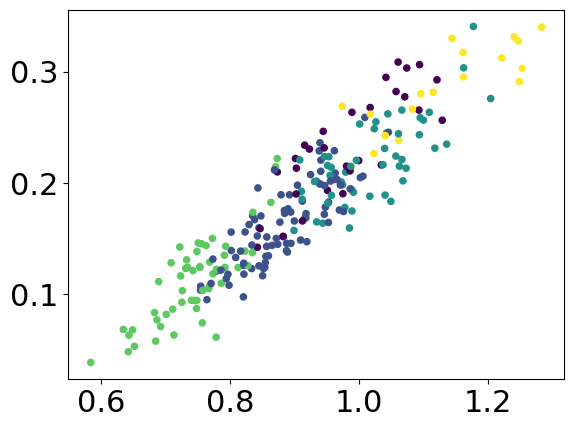

firstrun.nfix - reread


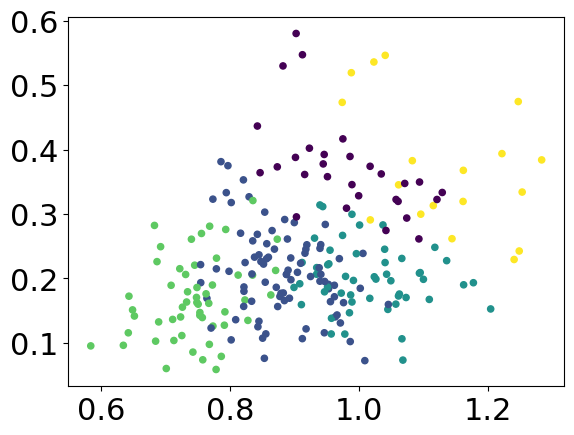

nfix - refix


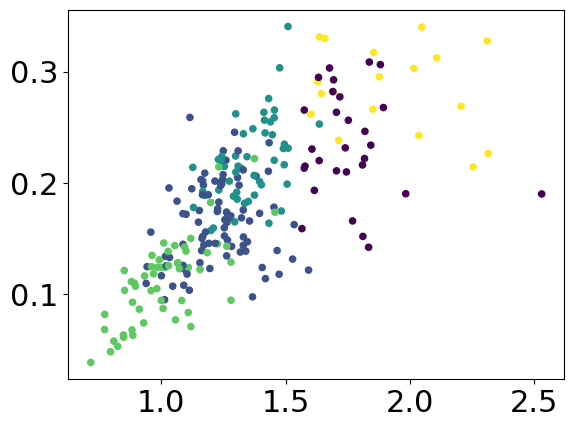

nfix - reread


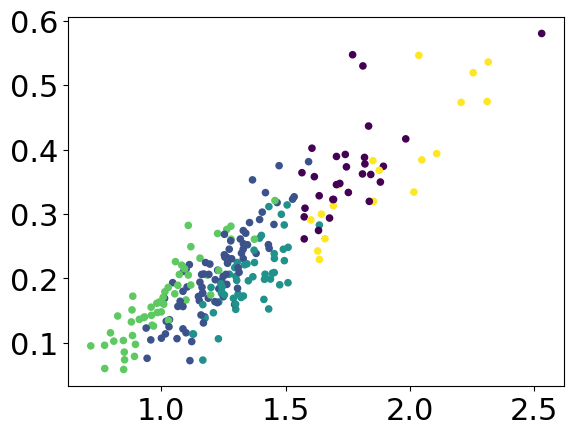

refix - reread


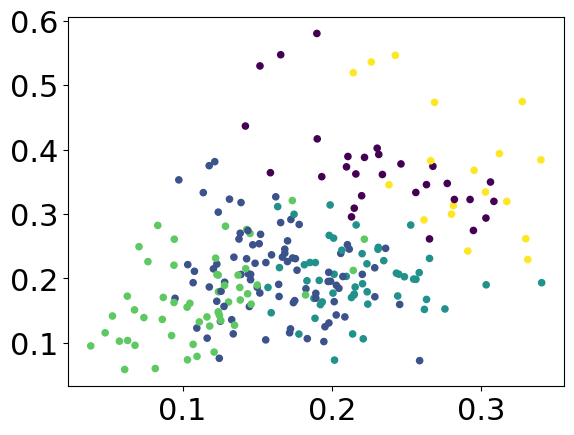

In [41]:
for i in range(len(gaze_features)):
    for j in range(i+1, len(gaze_features)):
        feature_1 = gaze_features[i]
        feature_2 = gaze_features[j]

        print(f"{feature_1} - {feature_2}")
        plt.scatter(reader_grouped_df[feature_1], reader_grouped_df[feature_2], c=kmeans.labels_, s=20)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.show()

In [42]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

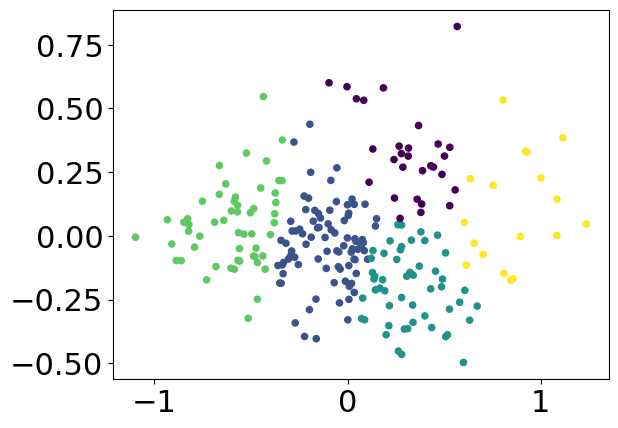

In [43]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

### Creating one dataset per cluster

In [44]:
readers_clusters = list()

for i in range(selected_k):
    readers_clusters.append(set(reader_grouped_df.loc[kmeans.labels_ == i, "uniform_id"]))
    
print(readers_clusters)

[{'sp_45', 'ge_46', 'ge_23', 'it_6', 'ru_43', 'en_6', 'it_32', 'it_1', 'it_42', 'en_39', 'ge_42', 'it_37', 'ge_6', 'sp_23', 'ge_15', 'sp_34', 'it_4', 'ge_50', 'sp_36', 'it_8', 'ge_40', 'it_44', 'sp_8', 'sp_51', 'sp_19', 'it_45', 'it_10', 'sp_5', 'it_19'}, {'ru_34', 'it_58', 'sp_9', 'it_13', 'sp_60', 'sp_24', 'en_60', 'it_28', 'ge_37', 'it_53', 'ge_41', 'sp_15', 'en_86', 'sp_12', 'en_37', 'ru_18', 'sp_32', 'ru_13', 'sp_61', 'en_93', 'it_33', 'sp_18', 'it_11', 'it_57', 'sp_33', 'ru_36', 'it_41', 'en_94', 'sp_55', 'en_79', 'ru_8', 'sp_38', 'ge_31', 'ge_8', 'sp_57', 'en_89', 'sp_50', 'en_102', 'en_101', 'ru_25', 'it_55', 'it_39', 'en_18', 'ru_14', 'en_82', 'it_49', 'it_2', 'it_30', 'it_23', 'ge_24', 'ge_44', 'it_18', 'ru_49', 'ru_32', 'it_15', 'sp_48', 'en_72', 'it_9', 'ru_5', 'sp_28', 'sp_31', 'en_38', 'ge_29', 'en_90', 'sp_4', 'ge_1', 'it_35', 'ru_42', 'ge_19', 'ru_9', 'en_87', 'ge_9', 'ru_21', 'en_57', 'ru_35', 'sp_37', 'en_21', 'it_20', 'ru_10', 'ge_32', 'ru_33', 'it_7', 'it_51', 'ru_1

In [45]:
df.uniform_id.isin(readers_clusters[0])

193910    False
193911    False
193912    False
193913    False
193914    False
          ...  
823175    False
823176    False
823177    False
823178    False
823179    False
Name: uniform_id, Length: 402834, dtype: bool

In [46]:
clustered_dfs = list()

for readers_cluster in readers_clusters:
    clustered_df = df[df.uniform_id.isin(readers_cluster)]
    clustered_dfs.append(clustered_df)

In [47]:
clustered_dfs

[        trialid  sentnum  ianum             ia lang uniform_id  skip  \
 202535      1.0      1.0    1.0             In   ge       ge_6   0.0   
 202536      1.0      1.0    2.0            der   ge       ge_6   0.0   
 202537      1.0      1.0    3.0          alten   ge       ge_6   0.0   
 202538      1.0      1.0    4.0      römischen   ge       ge_6   0.0   
 202539      1.0      1.0    5.0       Religion   ge       ge_6   0.0   
 ...         ...      ...    ...            ...  ...        ...   ...   
 804677     12.0      3.0   46.0            por   sp      sp_51   1.0   
 804678     12.0      3.0   47.0  jurisdicción.   sp      sp_51   0.0   
 804679     12.0      4.0   48.0             El   sp      sp_51   0.0   
 804680     12.0      4.0   49.0  identificador   sp      sp_51   0.0   
 804681     12.0      4.0   50.0             de   sp      sp_51   1.0   
 
         firstfix.dur  firstrun.dur     dur  firstrun.nfix  nfix  refix  reread  
 202535         144.0         144.0   14

### Mean gaze features inside each clustered dataset

In [48]:
group_by_cols = ["trialid", "sentnum", "ianum", "ia", "lang"]
grouped_cols = ["skip", "firstfix.dur", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "refix", "reread"]

for i in range(len(clustered_dfs)):
    grouped_clusterd_df = clustered_dfs[i].groupby(group_by_cols)[grouped_cols].mean()
    
    grouped_clusterd_df = grouped_clusterd_df.reset_index(level=0).reset_index(level=0).reset_index(level=0).reset_index(level=0).reset_index(level=0)
    
    grouped_clusterd_df["trial_sentnum"] = grouped_clusterd_df["sentnum"]
    grouped_clusterd_df["sentnum"] = grouped_clusterd_df["sentnum"].astype("string") + grouped_clusterd_df["trialid"].astype("string") + grouped_clusterd_df["lang"].astype("string")
    grouped_clusterd_df.sentnum = grouped_clusterd_df.sentnum.astype('category').cat.codes
    
    grouped_clusterd_df.rename(columns={"skip" : "prob_skip", "refix" : "prob_refix", "reread" : "prob_reread"}, inplace=True)
    
    grouped_clusterd_df.ianum = grouped_clusterd_df.ianum.astype(int)
    grouped_clusterd_df.trialid = grouped_clusterd_df.trialid.astype(int)
    grouped_clusterd_df.trial_sentnum = grouped_clusterd_df.trial_sentnum.astype(int)
    
    clustered_dfs[i] = grouped_clusterd_df

In [49]:
for clustered_df in clustered_dfs:
    print(clustered_df[["prob_skip", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "prob_refix", "prob_reread"]].corr())

               prob_skip  firstrun.dur       dur  firstrun.nfix      nfix  \
prob_skip       1.000000     -0.668523 -0.607286      -0.737509 -0.632398   
firstrun.dur   -0.668523      1.000000  0.768335       0.896608  0.692384   
dur            -0.607286      0.768335  1.000000       0.729721  0.955309   
firstrun.nfix  -0.737509      0.896608  0.729721       1.000000  0.758657   
nfix           -0.632398      0.692384  0.955309       0.758657  1.000000   
prob_refix     -0.430631      0.640573  0.689889       0.732296  0.735583   
prob_reread    -0.522078      0.402822  0.726651       0.432976  0.763450   

               prob_refix  prob_reread  
prob_skip       -0.430631    -0.522078  
firstrun.dur     0.640573     0.402822  
dur              0.689889     0.726651  
firstrun.nfix    0.732296     0.432976  
nfix             0.735583     0.763450  
prob_refix       1.000000     0.442487  
prob_reread      0.442487     1.000000  
               prob_skip  firstrun.dur       dur  first

In [50]:
for i, clustered_df in enumerate(clustered_dfs):
    print(f"Len dataset_{i} : {clustered_df.shape}")

Len dataset_0 : (10585, 14)
Len dataset_1 : (11908, 14)
Len dataset_2 : (10723, 14)
Len dataset_3 : (10225, 14)
Len dataset_4 : (10305, 14)


### Saving datasets

In [51]:
for i, clustered_df in enumerate(clustered_dfs):
    clustered_df.to_csv(f"datasets/cluster_{i}_dataset.csv")

### see distribution of data based on trial id

we can use last twe trial to compute validation and test set

In [53]:
for i, clustered_df in enumerate(clustered_dfs):
    
    print(f"\t--- Cluster {i} ---")
    
    for trial in df.trialid.unique():
        print(f"Percentage of samples in {trial}-th trial : {np.sum(clustered_df.trialid == trial)/clustered_df.shape[0]:.2f}%")

    print()

	--- Cluster 0 ---
Percentage of samples in 1.0-th trial : 0.09%
Percentage of samples in 2.0-th trial : 0.09%
Percentage of samples in 3.0-th trial : 0.10%
Percentage of samples in 4.0-th trial : 0.08%
Percentage of samples in 5.0-th trial : 0.07%
Percentage of samples in 6.0-th trial : 0.08%
Percentage of samples in 7.0-th trial : 0.09%
Percentage of samples in 8.0-th trial : 0.06%
Percentage of samples in 9.0-th trial : 0.08%
Percentage of samples in 10.0-th trial : 0.09%
Percentage of samples in 11.0-th trial : 0.09%
Percentage of samples in 12.0-th trial : 0.08%

	--- Cluster 1 ---
Percentage of samples in 1.0-th trial : 0.08%
Percentage of samples in 2.0-th trial : 0.08%
Percentage of samples in 3.0-th trial : 0.09%
Percentage of samples in 4.0-th trial : 0.09%
Percentage of samples in 5.0-th trial : 0.08%
Percentage of samples in 6.0-th trial : 0.08%
Percentage of samples in 7.0-th trial : 0.10%
Percentage of samples in 8.0-th trial : 0.07%
Percentage of samples in 9.0-th trial 